In [328]:
import numpy as np
import seaborn as sns
import scipy as sp
import functools
%pylab inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal
import scipy.stats as stats
import time
import scipy as scipy
import sys

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/stats/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi', 'multivariate_normal', 'var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


- $ m(x) = E[f(x)],
k(x, x
0
) = E[(f(x) − m(x))(f(x
0
) − m(x
0
))],$
- $
 f(x) ∼ GP
m(x), k(x, x
0
)
$
. 

In [3]:
function_one = lambda x: x**2
function_two = lambda x: np.log(x)**2

In [4]:
sp.integrate.quad(function_one,1,100)


(333333.0, 3.700739714673773e-09)

In [31]:
first = sp.integrate.quad(function_one,1,100)[0]
second = sp.integrate.quad(function_one,1,100)[1]
function_one_pdf = lambda x: function_one(x) / (first - second)

In [32]:
function_two_pdf = lambda x: function_two(x) / sp.integrate.simps(function_two(range(1,100)),range(1,100))

In [33]:
sp.integrate.simps(function_two_pdf(range(1,100)) ,range(1,100)) # this is a pdf!

1.0

In [34]:
sum([function_one_pdf(i) for i in range(1,100)])# this is a pdf!

0.98505098505099598

In [9]:
mean_function = lambda x: function_one_pdf(x)*function_one(x)+function_two_pdf(x)*function_two(x)
mean_function(2)

0.00021568770285579944

In [386]:
covariance_function = lambda x,x_: function_one_pdf(x)*(function_one(x) - mean_function(x) )* \
                        function_two_pdf(x_)*(function_two(x_)-mean_function(x_))

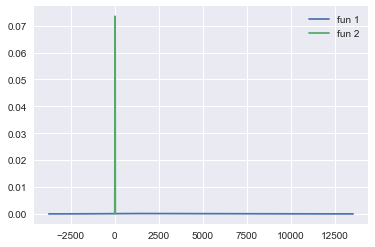

In [387]:
sns.kdeplot(np.array([function_one(i) for i in range(1,100)]),label='fun 1')
sns.kdeplot(function_two(range(1,100)) , label='fun 2')
plt.legend()

In [388]:
covariance_function(2.4,2)

1.6681421473598714e-08

In [389]:
# normal distribution to combine our model parameters
gp = lambda x,x_ : (mean_function(x),covariance_function(x,x_))

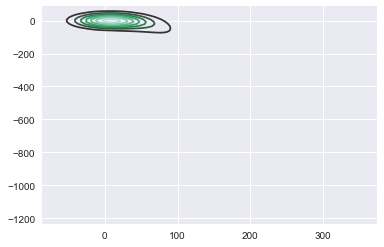

In [390]:
sns.kdeplot(np.array([gp(i,i) for i in range(1,100)]))

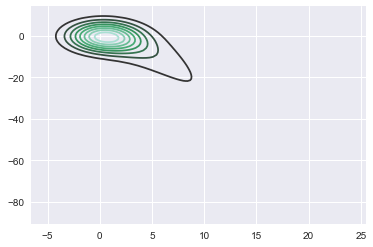

In [391]:
sns.kdeplot(np.array([gp(i,x) for i,x in zip(range(1,100),range(50,100))]))

# Gaussian  Normal Distirbution

- $ cov
f(xp), f(xq)

= k(xp, xq) = exp
−
1
2
|xp − xq|
2

. $
- $f∗ ∼ N
0, K(X∗, X∗)

, $

In [280]:
cov_normal = lambda x,x_ : np.exp(-.5*abs(x - x_)**2)

In [288]:
gaussian_vector = lambda x,x_ : sp.stats.norm(0,cov_normal(x,x_)).rvs()

(-5, 5)

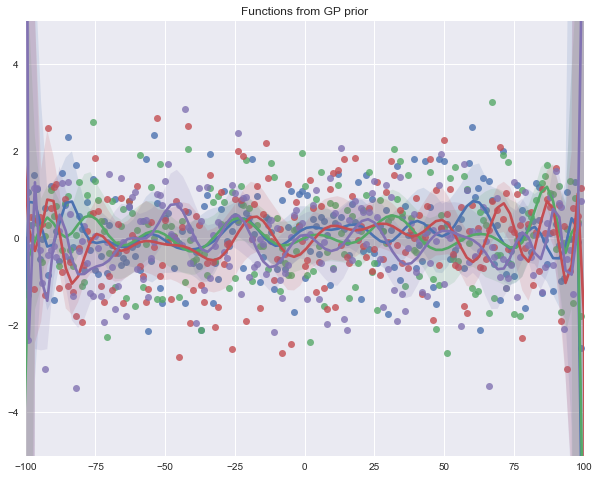

In [399]:

plt.figure(figsize=(10,8))
plt.title('Functions from GP prior')
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]),order=32)
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]),order=25)
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]),order = 27)
sns.regplot(np.array(range(-100,100)),np.array([gaussian_vector(i,i) for i in range(-100,100)]), order = 31)
plt.xlim(-100,100)
plt.ylim(-5,5)

## Noise free predictive distribution

$f∗|X∗, X,f ∼ N
K(X∗, X)K(X, X)
−1
f,
K(X∗, X∗) − K(X∗, X)K(X, X)
−1K(X, X∗)
$

Squarred Exponential =

- $exp
−
1
2
|xp − xq|
2

.$

In [640]:
squarred_exp_cv = lambda x_train,x_test : np.exp(-.5*abs(x_train - x_test)**2)

In [641]:
training = range(-100,100)
test = range(-200,100)
cov_training_training  = np.array([[cov_normal(x_,x_) for x_ in range(-100,100)] for _ in range(-100,100)])
cov_training_test = np.array([[cov_normal(x_,x) for (x_,x) in zip(range(-100,100),range(-200,100))]
                              for _ in range(-100,100)])

# Noisy predictive distribution
- training points = (-100,100)
- test points = (-200,300,400) # only two

In [517]:
training_funcion  =  lambda x: x/4

In [827]:
train_x = np.linspace(-500,100,300) # x values
test_x = np.linspace(-10,99,20)
train_y = np.array(list(map(training_funcion,train_x))).reshape(-1,1) # columns vector
train_y_var = np.var(train_y)

In [828]:
list(test_x)

[-10.0,
 -4.2631578947368425,
 1.473684210526315,
 7.2105263157894726,
 12.94736842105263,
 18.684210526315788,
 24.421052631578945,
 30.157894736842103,
 35.89473684210526,
 41.631578947368418,
 47.368421052631575,
 53.105263157894733,
 58.84210526315789,
 64.578947368421041,
 70.315789473684205,
 76.05263157894737,
 81.78947368421052,
 87.526315789473671,
 93.263157894736835,
 99.0]

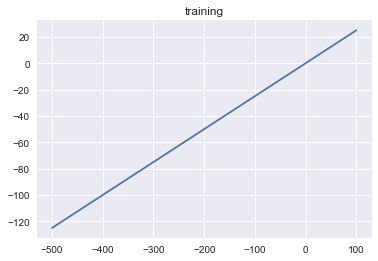

In [829]:
plt.plot(train_x,train_y)
plt.title('training');

In [830]:
train_y_var

1887.5418060200668

In [831]:

#squarred exponential covariance kernel
squarred_exponential_kernel = lambda x_,x: np.exp(-.5*(x_ - x)**2)


In [832]:
# find the covariance between the data points
cov_test_train_matrix = np.zeros((len(test_x),len(train_x)))
cov_test_test_matrix = np.zeros((len(test_x),len(test_x)))
cov_train_test_matrix = np.zeros((len(train_x),len(test_x)))
cov_train_train_matrix = np.zeros((len(train_x),len(train_x))) # assume noisy prediction
                                 

for idx_test, x_test in enumerate(test_x):
    for idx_train, x_train in enumerate(train_x):
        cov_test_train_matrix[idx_test,idx_train] = squarred_exponential_kernel(x_test,x_train)

for idx_test1, x_test1 in enumerate(test_x):
    for idx_test2, x_test2 in enumerate(test_x):
        cov_test_test_matrix[idx_test1,idx_test2]= squarred_exponential_kernel(x_test1,x_test2)
                                 
for idx_train, x_train in enumerate(train_x):
    for idx_test, x_test in enumerate(test_x):
        cov_train_test_matrix[idx_train,idx_test] = squarred_exponential_kernel(x_train,x_test)

for idx_train1, x_train1 in enumerate(train_x):
    for idx_train2, x_train2 in enumerate(train_x):
        cov_train_train_matrix[idx_train1,idx_train2] = squarred_exponential_kernel(x_train1,x_train2)
        
 

In [833]:
 # assume noisy predictions so teh covariance between the training points (train,train) has
# to add the variance of the y values
training_y_cov_matrix = np.zeros((len(cov_train_train_matrix),len(cov_train_train_matrix)), int)
np.fill_diagonal(training_y_cov_matrix, train_y_var)

In [834]:
cov_train_train_matrix = cov_train_train_matrix  + training_y_cov_matrix 

In [835]:
expected_mean_noisy_predictions = cov_test_train_matrix @ np.linalg.inv(cov_train_train_matrix) @train_y 

In [836]:
expected_mean_noisy_predictions  # test points,  predicted means

array([[-0.00167084],
       [-0.00071718],
       [ 0.00025115],
       [ 0.00120127],
       [ 0.00212311],
       [ 0.00304346],
       [ 0.00400115],
       [ 0.00500526],
       [ 0.00601691],
       [ 0.00697653],
       [ 0.00785747],
       [ 0.00869936],
       [ 0.00958654],
       [ 0.01058178],
       [ 0.01166724],
       [ 0.01274557],
       [ 0.01370913],
       [ 0.01452828],
       [ 0.015287  ],
       [ 0.01598296]])

In [837]:
test_x

array([-10.        ,  -4.26315789,   1.47368421,   7.21052632,
        12.94736842,  18.68421053,  24.42105263,  30.15789474,
        35.89473684,  41.63157895,  47.36842105,  53.10526316,
        58.84210526,  64.57894737,  70.31578947,  76.05263158,
        81.78947368,  87.52631579,  93.26315789,  99.        ])

In [838]:
expected_cov_noisy_predictions = cov_test_test_matrix - cov_test_train_matrix @ np.linalg.inv(cov_train_train_matrix)\
                    @ cov_train_test_matrix

In [839]:
expected_cov_noisy_predictions 

array([[  9.99499413e-001,  -3.60707238e-008,   7.86504468e-017,
         -5.15134731e-028,  -2.91415662e-036,   1.87762374e-046,
          1.02682962e-055,  -1.70319300e-065,  -4.11947444e-075,
          9.12557027e-085,   1.49613620e-094,  -3.91486962e-104,
         -3.27262773e-114,   1.82511162e-123,   2.50369655e-135,
         -8.98954200e-143,   2.74379175e-153,   3.69846602e-162,
         -2.20024988e-172,  -1.22776682e-181],
       [ -3.60707238e-008,   9.99454295e-001,  -3.11993651e-008,
          7.69513909e-017,  -1.38551157e-027,  -2.73281573e-036,
          2.77597656e-046,   1.05526401e-055,  -1.93786500e-065,
         -4.29064505e-075,   9.02252488e-085,   1.31238418e-094,
         -4.01961701e-104,  -2.03985061e-114,   2.02809226e-123,
         -1.50649332e-134,  -9.40413495e-143,   2.79690327e-153,
          3.46266838e-162,  -2.86829236e-172],
       [  7.86504468e-017,  -3.11993651e-008,   9.99466599e-001,
         -4.20315855e-008,   6.85806383e-017,  -2.87759630e-0

In [840]:
expected_cov_noisy_predictions.shape # NXN for the test points

(20, 20)

### Now, define a normal distribution given the parameters above

In [841]:
predictive_normal_noisy = sp.stats.multivariate_normal(expected_mean_noisy_predictions.ravel(),
                                                       expected_cov_noisy_predictions  )

In [842]:
predictive_normal_noisy.rvs()

array([ 0.11631433,  0.63064788, -0.14584552,  0.05949357, -1.9149441 ,
        0.48986877, -0.16532072,  0.46508993,  0.11344726, -0.6033401 ,
        1.0326625 , -1.96165292, -1.24253234, -0.19303591,  0.29424613,
       -0.28887835, -1.31724066,  1.15679366,  0.76111333, -1.07773477])

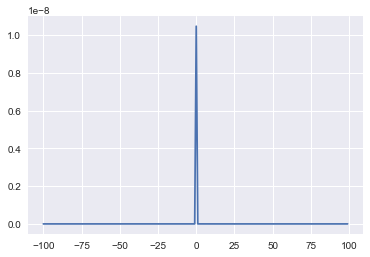

In [843]:
plt.plot(range(-100,100),[predictive_normal_noisy.pdf(i) for i in range(-100,100)])

In [844]:
predictive_normal_noisy.rvs(range_)

array([ 1.85273482, -1.29383106, -1.10035843,  0.96259757, -1.90368937,
       -1.7980305 , -2.67960172,  0.16163663,  1.48228845,  1.12602373,
        0.55455149,  0.60640082, -1.17230058,  0.11380901, -0.58935768,
       -1.15488053,  1.35193244,  0.51629356,  0.70305001, -1.59059142])

In [845]:
test_x

array([-10.        ,  -4.26315789,   1.47368421,   7.21052632,
        12.94736842,  18.68421053,  24.42105263,  30.15789474,
        35.89473684,  41.63157895,  47.36842105,  53.10526316,
        58.84210526,  64.57894737,  70.31578947,  76.05263158,
        81.78947368,  87.52631579,  93.26315789,  99.        ])

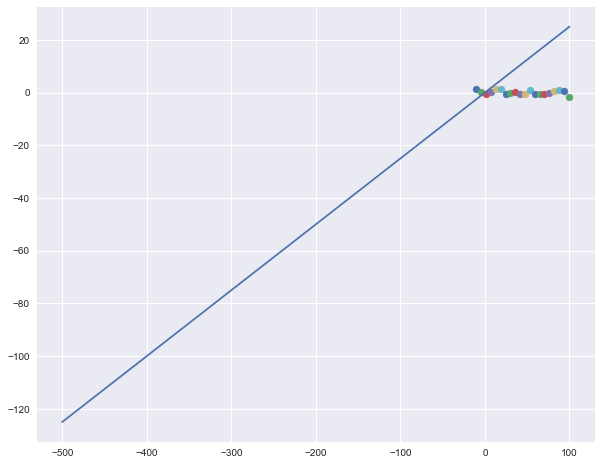

In [846]:
plt.figure(figsize=(10,8))
range_ = 1
predicted_points = predictive_normal_noisy.rvs(range_).T
#plt.scatter(test_x[0] ,predicted_points[0])

[plt.scatter(test_x[i],predicted_points[i]) for i in range(len(test_x))]
#plt.scatter(test_x[2],predicted_points[2])
#3plt.scatter(test_x[3],predicted_points[3])
plt.plot(train_x,train_y)
#plt.scatter(test_x[0],training_funcion(test_x[0]),label='X');#

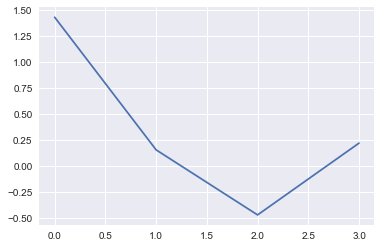

In [847]:
plt.plot([np.mean(predicted_points[0]), np.mean(predicted_points[1]), np.mean(predicted_points[2]),
         np.mean(predicted_points[3])])

In [ ]:
np.random.multivariate_normal()

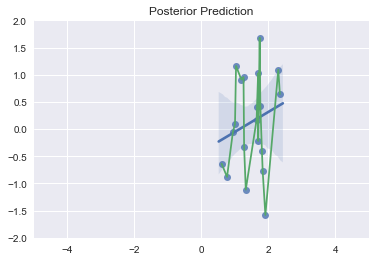

In [549]:
# random draws from the distrbution's posterior predictive
predicted_points = predictive_normal_noisy.rvs(20).T
predicted_points = np.array(sorted(predicted_points.T, key=lambda x: x[0])).T # sort the points
sns.regplot(*predicted_points,order=1)

#sns.regplot(*predicted_points,order=2)
plt.plot(*np.array(sorted(predicted_points.T, key=lambda x: x[0])).T) # plot them in order of smallest to largest
plt.xlim(-5,5)
plt.ylim(-2,2);
plt.title('Posterior Prediction')

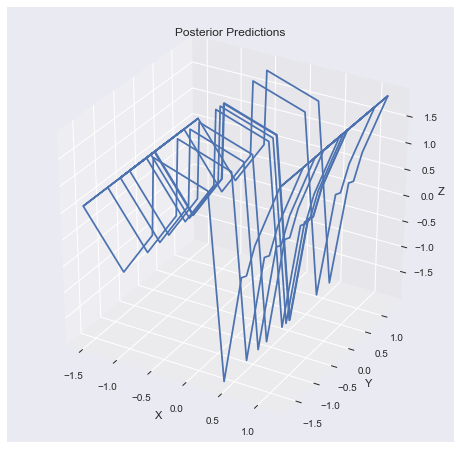

In [469]:


predicted_points = predictive_normal_noisy.rvs(10).T
predicted_points = np.array(sorted(predicted_points.T, key=lambda x: x[0])).T # sort the points

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

#t = np.linspace(-3, 2, 31)
#s = np.linspace(-3, 2, 31)
x = predicted_points[0]
y = predicted_points[1]
z = predicted_points[2]

X, Y = np.meshgrid(x,y)
Z  = np.meshgrid(z,y)

ax.plot_wireframe(X,Y,Z[0],ccount=1, rcount=10)
#ax.plot_wireframe(X,Y,Z[1],ccount=1)
#ax.plot_surface(x,y,z, cmap=cm.jet, rstride=1, cstride=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Posterior Predictions')

plt.show()

In [1708]:


x, y = np.mgrid[-5.0:5.0:50j, -5.0:5.0:50j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])
print(xy)
mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)

z =predictive_normal_noisy .pdf(xy)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)





fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)
plt.title('PDF of multivariate gaussian process')
plt.show()

[[-5.         -5.        ]
 [-5.         -4.79591837]
 [-5.         -4.59183673]
 ..., 
 [ 5.          4.59183673]
 [ 5.          4.79591837]
 [ 5.          5.        ]]


ValueError: operands could not be broadcast together with shapes (2500,2) (20,) 

# New Attempt from Readings. Bayesian Gaussian Process Regression
- Gaussian Process for Regression: A Quick Introduction
    - M. Ebden
- http://haikufactory.com/files/bayopt.pdf

###  Assmptions
- Prior is a Gaussian Process with mean = 0

In [279]:
def squarred_kernel(a, b, param=2.0, train=False, train_noise = 5e-10):
    """Calculated the squarred exponential kernel. 
    Adds a noise term for the covariance of the training data
    Adjusting the param changes the difference where points will have a positive covariance
    Returns a covaraince Matrix"""
    if train == False:
        sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
        return np.exp(-.5 * (1/param) * sqdist)

    else:
        noisy_observations = train_noise*np.eye(len(a))
        sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T) 
        return np.exp(-.5 * (1/param) * sqdist) + noisy_observations 

In [567]:
def matern_kernel(a,b,C_smoothness=3/2,train=False, train_noise = 5e-2):
    """The class of Matern kernels is a generalization of the RBF and the
    absolute exponential kernel parameterized by an additional parameter
    nu. The smaller nu, the less smooth the approximated function is.
    For nu=inf, the kernel becomes equivalent to the RBF kernel and for nu=0.5
    to the absolute exponential kernel. Important intermediate values are
    nu=1.5 (once differentiable functions) and nu=2.5 (twice differentiable
    functions).
    
    c_smoother = inf = RBF
    
    The train keyword is used to add noisy observations to the matrix"""
    matrix_norm = np.array([np.linalg.norm(a[i] - b,axis=(1)) for i in range(len(a))])
    if C_smoothness == 1/2:
        return max(np.var(a),np.var(b)) * np.exp(-matrix_norm)
    elif C_smoothness == 3/2:
        return max(np.var(a),np.var(b))* (1 +np.sqrt(3)*matrix_norm)*np.exp(-np.sqrt(3)*matrix_norm)
    
    elif train == False:
        return 1/(2**(C_smoothness-1)*scipy.special.gamma(C_smoothness)) *(
            2*np.sqrt(C_smoothness)*matrix_norm)**C_smoothness*(
        scipy.special.jv(C_smoothness,(2*np.sqrt(C_smoothness)*matrix_norm)))
    else:
        noisy_observations = train_noise*np.eye(len(a))
        return 1/(2**(C_smoothness-1)*scipy.special.gamma(C_smoothness)) *(
            2*np.sqrt(C_smoothness)*matrix_norm)**C_smoothness*(
        scipy.special.jv(C_smoothness,(2*np.sqrt(C_smoothness)*matrix_norm))) + noisy_observations
    
   

In [510]:
from math import pi

In [949]:
test_x = np.array(np.linspace(-40,40,100)).reshape(-1,1)
train_x = np.array(np.linspace(-45,45,10)).reshape(-1,1)
train_y_func = lambda x: cos(1000*x)+(abs(x*100_000))/(x**4+1000)
#train_y_func = lambda a,b : (a*b)/(a**2) - b
train_y_numbers = np.array([train_y_func(_) for _ in train_x]).reshape(-1,1)
y_var = np.var(train_y_numbers)
#max_covariance = np.sqrt(y_var) ## not sure a good number to choose for the noise of measuring your observations
max_covariance = 5


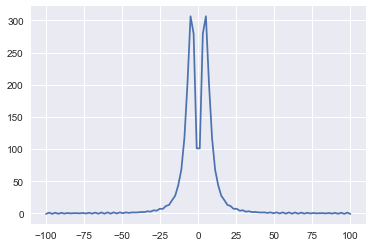

In [950]:
plt.plot(np.linspace(-100,100,100),[train_y_func(i) for i in np.linspace(-100,100,100)])

In [914]:
zero_vecs = vecs [vals<0]
zero_vals = vals[[vals<0]]

In [915]:
new_matrix = matern_kernel(test_x,test_x)
for i in range(len(zero_vecs)):
    print(i)
    

    new_matrix = (np.array(vecs [vals<0][i,:]).reshape(-1,1) @ (np.array( vecs [vals<0][i,:]).reshape(-1,1).T))   \
    *(sys.float_info.epsilon-vals[vals<0][i])\
                  +new_matrix
    vals, vecs = np.linalg.eig(new_matrix)


In [916]:
np.linalg.eig(new_matrix)

(array([ 1561.06128573,  1556.56312003,  1549.10923162,  1538.76334522,
         1525.61299064,  1509.76788412,  1491.35793806,  1470.53096108,
         1447.45011752,  1422.29122016,  1395.23993068,  1366.48894064,
         1336.23520136,  1304.67726402,  1272.01278302,  1238.43622596,
         1204.13682344,  1169.2967813 ,  1134.08976839,  1098.67968366,
         1063.21969804,  1027.85156007,   992.70514845,   957.89825058,
          923.53654316,   889.71374935,   856.51194625,   824.00199673,
          792.24408058,   761.28830165,   731.17534941,   701.93719565,
          673.59780949,   646.17387609,   619.67550687,   594.10693135,
          569.46716253,   545.75062995,   522.94777601,   501.04561247,
          480.02823568,   459.8772998 ,   440.57244814,   422.09170371,
          404.41182022,   387.50859555,   371.35714964,   355.93216918,
          341.20812158,   327.15944048,   313.76068542,   300.98667795,
          288.81261644,   277.21417187,   266.16756655,   255.64

In [917]:
## (vecs [vals<0] @ vecs [vals<0].T)*(sys.float_info.epsilon-vals[[vals<0]])+matern_kernel(test_x,test_x)

In [918]:
np.linalg.cholesky((vecs [vals<0][0,:]*vecs [vals<0][0,:].T) +matern_kernel(test_x,test_x))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [919]:
vecs

array([[-0.00770559, -0.01537401,  0.02296878, ..., -0.01829405,
        -0.03037345,  0.01525505],
       [-0.01196948, -0.02383799,  0.0355064 , ...,  0.04409884,
         0.0713342 , -0.03693669],
       [-0.01622215, -0.03221261,  0.04774461, ..., -0.06835332,
        -0.10536544,  0.05771577],
       ..., 
       [-0.01622215,  0.03221261,  0.04774461, ..., -0.06835332,
        -0.10536544, -0.05771577],
       [-0.01196948,  0.02383799,  0.0355064 , ...,  0.04409884,
         0.0713342 ,  0.03693669],
       [-0.00770559,  0.01537401,  0.02296878, ..., -0.01829405,
        -0.03037345, -0.01525505]])

In [920]:
matern_kernel(test_x,test_x).shape

(100, 100)

In [921]:
t = (np.array(vecs [vals<0][0,:]).reshape(-1,1) @ (np.array( vecs [vals<0][0,:]).reshape(-1,1).T))

IndexError: index 0 is out of bounds for axis 0 with size 0

In [922]:
r = np.array(vecs [vals<0][0,:]).reshape(-1,1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [923]:
c= np.array( vecs [vals<0][0,:]).reshape(-1,1).T

IndexError: index 0 is out of bounds for axis 0 with size 0

In [924]:
c.shape

(1, 100)

In [925]:
p = r @ r.T

In [926]:
p.shape

(100, 100)

In [927]:
len(vecs [vals<0][:,0])

0

In [928]:
vals[vals<0]=5e-5

In [929]:
new_m = vecs @ np.eye(len(vecs))*vals @ vecs.T

In [930]:
new_m = (np.array(vecs [vals<0][0,:]).reshape(-1,1) @ (np.array( vecs [vals<0][0,:]).reshape(-1,1).T))\
    *(sys.float_info.epsilon-vals[vals<0][0]) +matern_kernel(test_x,test_x)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [931]:
np.linalg.eig(new_m)

(array([ 1417.2345914 ,  1411.48538365,  1402.01050036,  1388.96601807,
         1372.56156537,  1353.05223454,  1330.7292079 ,  1305.90970576,
         1278.92685038,  1250.11997752,  1219.82582676,  1188.37092155,
         1156.06532458,  1123.19783746,  1090.03261464,  1056.80708594,
         1023.73103037,   990.98661539,   958.7292064 ,   927.08875689,
          896.1716058 ,   866.06253072,   836.82693114,   808.51304101,
          781.15409407,   754.77038643,   729.37119929,   704.95655919,
          681.51882522,   659.04410098,   637.51347606,   616.90410572,
          597.19014057,   578.34351937,   560.33463893,   543.13291464,
          526.70724517,   511.02639345,   496.05929561,   481.77530803,
          468.14440182,   455.13731284,   442.72565449,   430.88199939,
          419.5799354 ,   408.79410046,   398.50020032,   388.6750124 ,
          379.29637853,   370.3431891 ,   361.79536035,   353.63380667,
          345.84040909,   338.39798117,   331.2902331 ,   324.50

In [932]:
from numpy import linalg as la
#https://stackoverflow.com/questions/43238173/python-convert-matrix-to-positive-semi-definite/43244194#43244194
def nearestPD(A):
    """Find the nearest positive-definite matrix to input

    A Python/Numpy port of John D'Errico's `nearestSPD` MATLAB code [1], which
    credits [2].

    [1] https://www.mathworks.com/matlabcentral/fileexchange/42885-nearestspd

    [2] N.J. Higham, "Computing a nearest symmetric positive semidefinite
    matrix" (1988): https://doi.org/10.1016/0024-3795(88)90223-6
    """

    B = (A + A.T) / 2
    _, s, V = la.svd(B)

    H = np.dot(V.T, np.dot(np.diag(s), V))

    A2 = (B + H) / 2

    A3 = (A2 + A2.T) / 2

    if isPD(A3):
        return A3

    spacing = np.spacing(la.norm(A))
    # The above is different from [1]. It appears that MATLAB's `chol` Cholesky
    # decomposition will accept matrixes with exactly 0-eigenvalue, whereas
    # Numpy's will not. So where [1] uses `eps(mineig)` (where `eps` is Matlab
    # for `np.spacing`), we use the above definition. CAVEAT: our `spacing`
    # will be much larger than [1]'s `eps(mineig)`, since `mineig` is usually on
    # the order of 1e-16, and `eps(1e-16)` is on the order of 1e-34, whereas
    # `spacing` will, for Gaussian random matrixes of small dimension, be on
    # othe order of 1e-16. In practice, both ways converge, as the unit test
    # below suggests.
    I = np.eye(A.shape[0])
    k = 1
    while not isPD(A3):
        mineig = np.min(np.real(la.eigvals(A3)))
        A3 += I * (-mineig * k**2 + spacing)
        k += 1

    return A3

def isPD(B):
    """Returns true when input is positive-definite, via Cholesky"""
    try:
        _ = la.cholesky(B)
        return True
    except la.LinAlgError:
        return False


In [933]:
def test_gaussian_process(test_x, train_x, train_y_numbers, y_var, kernel, return_cov = False,
                          return_sample = False, covariance_noise = 5e-15, n_posteriors = 5):
    """Test one new point in the Gaussian process or an array of points
    Returns the mean, var from normal distribution from the sampled point.
    Return cov = True will return the full covariance matrix.
    
    If return_sample= True 
    returns samples from the informed posterior and the uninformed prior distribution
    
    Covariance noise is used to help enforce positive definite matrices
    
    N_posteriors indicates the number of posterior functions to create"""
    
    y_var = np.var(train_y_numbers)
    
    # define the covaraince functions
    covariance_train_train = kernel(train_x,train_x,train=True)
    
    covariance_test_train  = kernel(test_x,train_x)
    covariance_test_test  = kernel(test_x,test_x)
    

    # Use cholskey decomposition to increase speed for calculating mean
    try :# First try, not inside function
        L_test_test = np.linalg.cholesky(covariance_test_test + covariance_noise*np.eye(len(covariance_test_test)))
        L_train_train = np.linalg.cholesky(covariance_train_train + covariance_noise*np.eye(len(covariance_train_train)))
        Lk = np.linalg.solve(L_train_train, covariance_test_train.T)
        mus = np.dot(Lk.T, np.linalg.solve(L_train_train, train_y_numbers)).reshape((len(test_x),))
        # Compute the standard deviation so we can plot it
        s2 = np.diag(covariance_test_test) - np.sum(Lk**2, axis=0)
        stdv = np.sqrt(abs(s2))
        

    # Full matrix calculation of mean and covariance, much slower than cholesky decomposition
    except Exception as e:
        print(e)#LinAlgError: # In case the covaraince matrix is not positive definite 
        # remove the negative eigenvalues, replace with the covariance noise , recompute the covariance matrix
        
        vals_train_train, vecs_train_train = np.linalg.eig(covariance_train_train + covariance_noise*np.eye(len(train_x)))
        vals_test_test, vecs_test_test = np.linalg.eig(covariance_test_test + covariance_noise*np.eye(len(test_x)))
        # replace negative eigenvalues
        vals_train_train[vals_train_train<0] = 5e-15
        vals_test_test[vals_test_test<0] = 5e-15
        # recompute matrix
        covariance_train_train = vecs_train_train @ np.eye(len(vecs_train_train))*vals_train_train @vecs_train_train.T
        covariance_test_test = vecs_test_test @ np.eye(len(vecs_test_test))*\
            vals_test_test @vecs_test_test.T
#         print(covariance_test_test.shape,'cov test test shape')
#         print()
#         print(np.linalg.eig(covariance_test_test), ' cov test test after removing negative eigen vals')
        decompose_train_train = covariance_train_train + covariance_noise*np.eye(len(train_x))
        decompose_test_test = covariance_test_test + covariance_noise*np.eye(len(test_x))
        
        # cholskey decomposition within the try except block
        L_train_train = np.linalg.cholesky(decompose_train_train  )
        L_test_test = np.linalg.cholesky(decompose_test_test  )
        Lk = np.linalg.solve(L_train_train, covariance_test_train.T)
        mus = np.dot(Lk.T, np.linalg.solve(L_train_train, train_y_numbers)).reshape((len(test_x),))
        # Compute the standard deviation so we can plot it
        s2 = np.diag(covariance_test_test) - np.sum(Lk**2, axis=0)
        stdv = np.sqrt(abs(s2))
        
        
#         ##### FULL INVERSION IN CASE REMOVING NEGATIVE EIGENVAL DOESN"T WORK ####
#         mus = covariance_test_train  @ np.linalg.pinv(covariance_train_train) @ train_y_numbers
#         s2 = covariance_test_test - covariance_test_train @ np.linalg.pinv(covariance_train_train ) \
#                      @ covariance_test_train.T
        
    

    def sample_from_posterior(n_priors=3, n_post=5):
        """Draw samples from the prior distribution of the GP.
        len(test_x) is the number of samplese to draw.
        Resource: http://katbailey.github.io/post/gaussian-processes-for-dummies/.
        
        N-Posteriors / N-Priors tells the number of functions to samples from the dsitribution"""

        
        # Draw samples from the posterior at our test points.
        covariance_test_test  = kernel(test_x,test_x)
        try: # try inside sample from posterior function
            L = np.linalg.cholesky(covariance_test_test +  covariance_noise*np.eye(len(test_x))- np.dot(Lk.T, Lk))
        except Exception as e:
            near_decompose = nearestPD(covariance_test_test +  covariance_noise*np.eye(len(test_x))- np.dot(Lk.T, Lk))
            # decompose the nearest matrix
#             vals_test_test, vecs_test_test = np.linalg.eig(near_decompose)
            
#             # replace with small number
#             vals_test_test[vals_test_test<0] = 5e-2
# #             # recompute
           
#             covariance_test_test = vecs_test_test @ (np.eye(len(vecs_test_test))*\
#                 vals_test_test) @vecs_test_test.T
            
# #             #d_test_test = covariance_test_test + covariance_noise*np.eye(len(test_x))- np.dot(Lk.T, Lk)
# #             ##### calculate L 
# # #             decompose = covariance_test_test +  covariance_noise*np.eye(len(test_x)) - np.dot(Lk.T, Lk)
# #             decompose = decompose + 5e-1*np.eye(len(decompose))
#             print(np.linalg.eig(covariance_test_test ),'ear decompose decomposition')
            L = np.linalg.cholesky(near_decompose.astype(float) ) # within posterior

            
            
        f_post = mus.reshape(-1,1) + np.dot(L, np.random.normal(size=(len(test_x),n_posteriors)))

        # Sample 3 sets of standard normals for our test points,
        # multiply them by the square root of the covariance matrix
        f_prior_uninformed = np.dot(L_test_test, np.random.normal(size=(len(test_x),n_priors)))
        # For the posterior, the columns are the vector for that function
        return (f_prior_uninformed, f_post)


    if return_cov == True:
        return y_pred_mean.ravel(), var_y_pred_diag.ravel(), var_y_pred
        
    if return_sample == True:
        f_prior, f_post = sample_from_posterior(n_post = n_posteriors)
        return mus.ravel(), s2.ravel(), f_prior, f_post
    else:
        return mus.ravel(), s2.ravel()
    
   

In [934]:
m,var, prior, post = test_gaussian_process(np.array([[-10]]), train_x, train_y_numbers, 
                                                   y_var,squarred_kernel, return_sample = True)

In [935]:

def sample_and_plot_posterior(test_x, train_y_func, test_gaussian_process,kernel, range_to_sample=np.linspace(-35,35,25)):
    """Plot potential posterior functions after sampling from the true function.
    Notice how the varaince decreases around the sampled points"""
    train_x = np.array(np.linspace(-40,40,1)).reshape(-1,1)
    train_y_numbers = np.array([train_y_func(_) for _ in train_x]).reshape(-1,1)
    # shuffle the range
    shuffle(range_to_sample)
    # go through the points in the range
    for sampled_point in range_to_sample:
        print(f"Point Sampled x = {train_x.ravel()[-1]}")
        m,var, prior, post = test_gaussian_process(test_x, train_x, train_y_numbers, 
                                                   y_var,kernel, return_sample = True)

        plt.figure(figsize=(14,10))

        plt.gca().fill_between(test_x.flat, m-2*np.sqrt(var), m+2*np.sqrt(var), color="#dddddd",label='95% confidence')
        plt.scatter(train_x.ravel(), train_y_numbers,marker='*',label='Samples', linewidth=5, color='red')

        plt.plot(np.linspace(-40,40,400),[train_y_func(i) for i in np.linspace(-40,40,400)], label='real function',
                linestyle="--")
        plt.plot(test_x,post,color='black',label='Draws from the posterior')
        #plt.scatter(train_x,train_y_numbers)
        #plt.scatter(test_x,m,label='MU',color='red', linewidth=10, marker='*');
        plt.legend()
        plt.title('Posteriors, and Actual Function')
        plt.show();

        # Update training data with the sampled point
        train_x = train_x.ravel()
        train_x = np.append(train_x,sampled_point)
        train_x = train_x.reshape(-1,1)
        train_y_numbers = np.array([train_y_func(_) for _ in train_x]).reshape(-1,1)

        # sleep for three seconds
        time.sleep(1)

Point Sampled x = -40.0


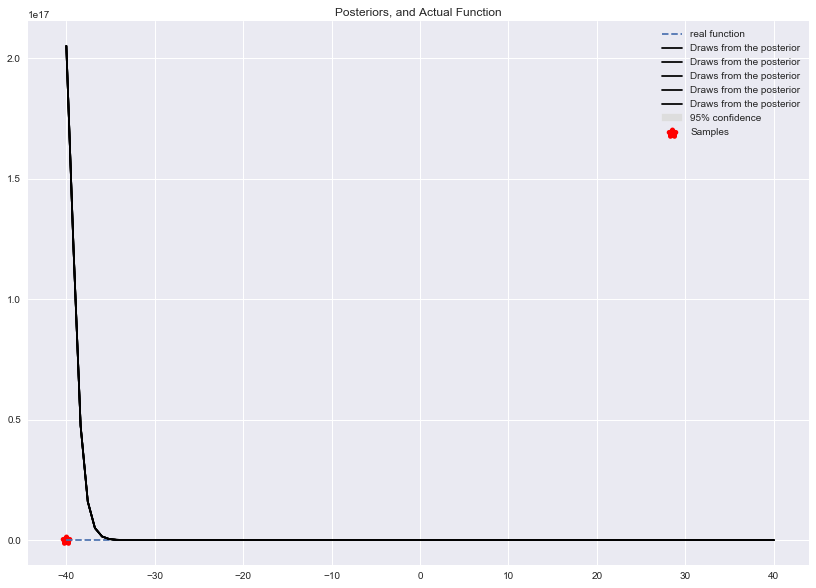

Point Sampled x = 14.583333333333329


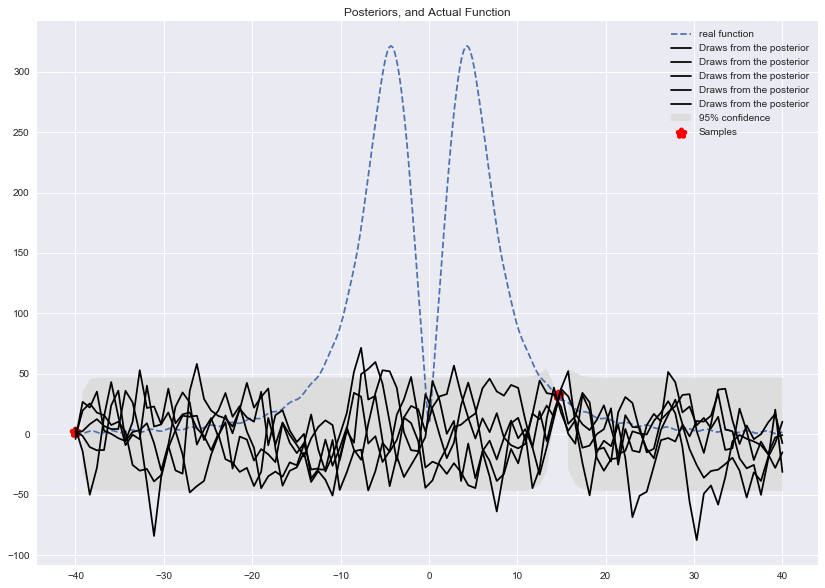

Point Sampled x = -8.75


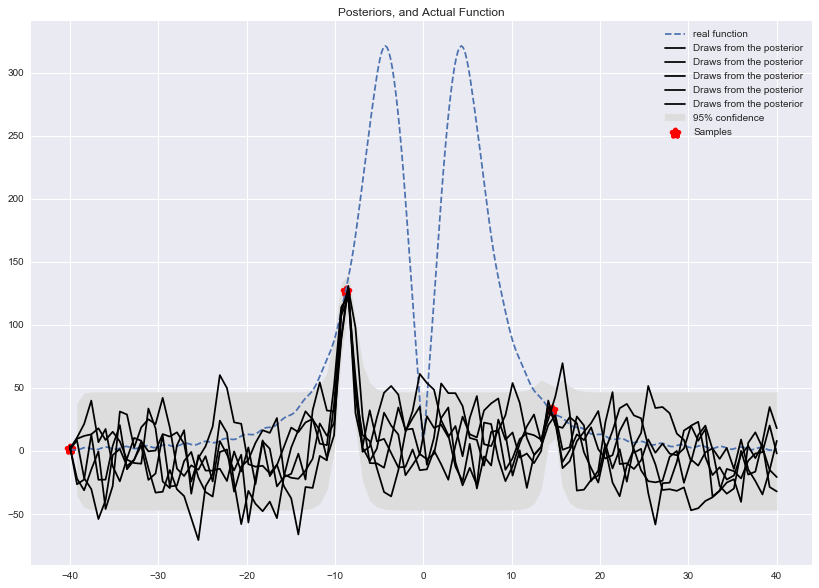

Point Sampled x = 17.5


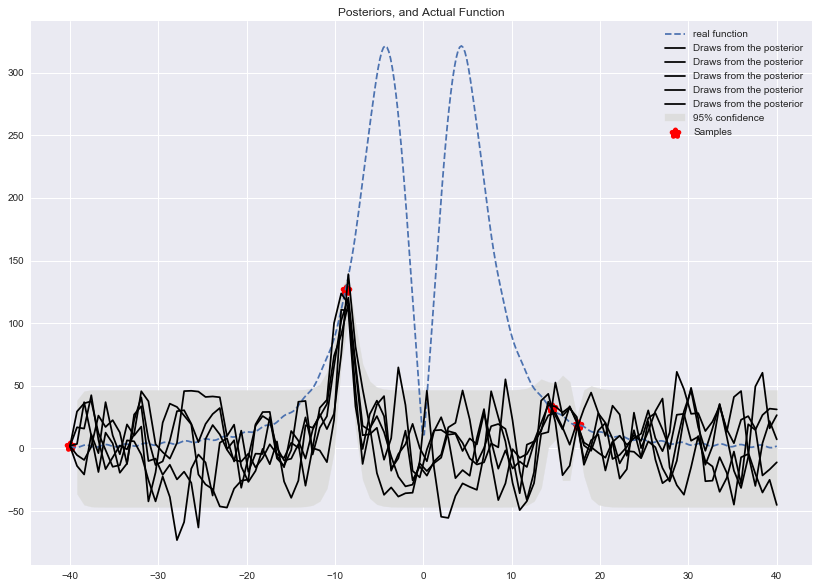

Point Sampled x = 2.9166666666666643


KeyboardInterrupt: 

In [936]:
sample_and_plot_posterior(test_x, train_y_func, test_gaussian_process, matern_kernel)

### Best estimate for Y* is given by the mean of the distribution


### Implement Expected Improvement


In [937]:
def expected_improvement(mean_x, sigma_squarred_x, y_val_for_best_hyperparameters, normal_dist=None, point_est = False):
    """Finds the expected improvement of a point give the current best point.
    If point_est = False, then computes the expected value on a vector from the posterior distribution.
    """
    from scipy.stats import norm
    
    with np.errstate(divide='ignore'): # in case sigma equals zero
        # Expected val for one point
        if point_est ==True:
            sigma_x = np.sqrt(sigma_squarred_x) # get the standard deviation from the variance

            Z = (mean_x - y_val_for_best_hyperparameters) / sigma_x

            if round(sigma_x,8) == 0:
                return 0
            else:
                return (mean_x - y_val_for_best_hyperparameters)*normal_dist.cdf(Z) + sigma_x*normal_dist.pdf(Z)

        else:
            # Sample from the posterior functions
            for _ in range(len(mean_x)):
                list_of_improvements = []
                m_s = []
                for m,z,s in zip(mean_x, ((mean_x -y_val_for_best_hyperparameters)\
                                     / np.std(sigma_squarred_x)),np.sqrt(sigma_squarred_x) ):
                    
                    list_of_improvements.append(((m-y_val_for_best_hyperparameters)*norm(m,s).cdf(z)\
                                                 +s*norm(m,s).pdf(z)))
                    m_s.append(m)
                    #print(m-y_val_for_best_hyperparameters,'top of Z')
                    
                    #print(norm(m,s).pdf(z),'norm(m,s).pdf(z)')
                    #print(z,'z')
                    #print(norm(m,s).cdf(z),'norm(m,s).cdf(z')
                    #print(m,'m')
                    #print(y_val_for_best_hyperparameters,'y_val_for_best_hyperparameters')
                    #print(s,'standard deviation BOTTOM OF Z')
                    #print()
                #print("min max Mu",min(m_s),max(m_s))
                return list_of_improvements

In [938]:
def thompson_sampling():
    """Thompson sampling to find the next point to pick"""

In [939]:
m,var, prior, post =  test_gaussian_process(np.array([[-400]]), train_x, train_y_numbers, 
                                                   y_var,squarred_kernel, return_sample = True)

In [940]:
m

array([ 0.])

In [959]:
def sample_from_function( y_function, 
                        train_x, train_y_numbers, kernel, y_var, testing_domain = range(-100,100,10), n = 20):
    """Sample N times from the unknown function and for each time find the 
    point that will have the highest expected improvement (find the maxima of the function).
    
    Returns a generator of x_sampled_points, y_sampled_points, vars_, best_x, best_y, \
                list_of_expected_improvements, testing_domain, mus
          for improvements. Mus and Vars are the mean and var for each sampled point in the gaussian process. 
    
    Starts off the search for expected improvement with a coarse search and then hones in on 
    the domain the the highest expected improvement."""
    start_point = np.random.randn()
    best_x = start_point
    best_y = y_function(start_point) # initial best y value based on start point
    start_y = y_function(start_point) 
    # for plotting the points sampled
    x_sampled_points = []
    y_sampled_points = []
    sampled_variance =[] 
    

    for i in range(n):
        if i == 0:
            
            s_p = np.array([testing_domain]).reshape(-1,1)
            
            
            # find the next x-point to sample
            mus, vars_,_,post = test_gaussian_process(s_p, train_x, train_y_numbers,
                                               y_var, kernel, return_sample = True, n_posteriors=30)
            
           
            sigmas_post = np.var(post,axis=1)
            mus_post = np.mean(post,axis=1)
            # get the expected values from the posterior distribution
            list_of_expected_improvements = expected_improvement(mus_post, sigmas_post ,best_y)

            max_improv_x_idx = np.argmax(list_of_expected_improvements)
            max_improv_x = s_p[max_improv_x_idx]
  
            max_improv_y = y_function(max_improv_x  ) 
            if max_improv_y > best_y: ## use to find out where to search next
                best_y = max_improv_y 
                best_x = max_improv_x
            else:
                best_x = start_point
            

            sampled_variance.append(sigmas_post[max_improv_x_idx])

            # append the point to sample
            x_sampled_points.append(max_improv_x)
            y_sampled_points.append(max_improv_y)
            
            # append our new the newly sampled point to the training data
            train_x = np.vstack((train_x, max_improv_x))
            train_y_numbers = np.vstack((train_y_numbers, max_improv_y))
            yield x_sampled_points, y_sampled_points, vars_, best_x, best_y, \
                list_of_expected_improvements, s_p, mus
            

        else:

            testing_domain = np.linspace(testing_domain[0],testing_domain[-1],
                                        num=500).reshape(-1,1)
            
            mus, vars_,_,post = test_gaussian_process(testing_domain, train_x, train_y_numbers,
                                               y_var, kernel, return_sample = True, n_posteriors=30)
     


            sigmas_post = np.var(post,axis=1)
            mus_post = np.mean(post,axis=1)
            
            # get the expected values from the posterior distribution
            list_of_expected_improvements = expected_improvement(mus_post, sigmas_post, best_y)
            
            

            max_improv_x_idx = np.argmax(list_of_expected_improvements)
            max_improv_x = testing_domain[max_improv_x_idx]
  
            max_improv_y = y_function(max_improv_x  ) 
            if max_improv_y > best_y: ## use to find out where to search next
                best_y = max_improv_y 
                best_x = max_improv_x
            else:
                pass
            print(best_x,'best_x')

            sampled_variance.append(sigmas_post[max_improv_x_idx])

            # append the point to sample
            x_sampled_points.append(max_improv_x)
            y_sampled_points.append(max_improv_y)
            
            # append our new the newly sampled point to the training data
            print(max_improv_x,'improv x')
            train_x = np.vstack((train_x, max_improv_x))
            train_y_numbers = np.vstack((train_y_numbers, max_improv_y))
            
            yield x_sampled_points, y_sampled_points, vars_, best_x, best_y, \
                list_of_expected_improvements, testing_domain, mus
         


    

In [960]:
samples = 10

In [965]:
#x, y, variance_of_estimate, best_x,best_y = 
gen = sample_from_function(train_y_func,train_x, train_y_numbers,squarred_kernel, y_var, n=samples )

Point on x-axis just sampled =[-100]


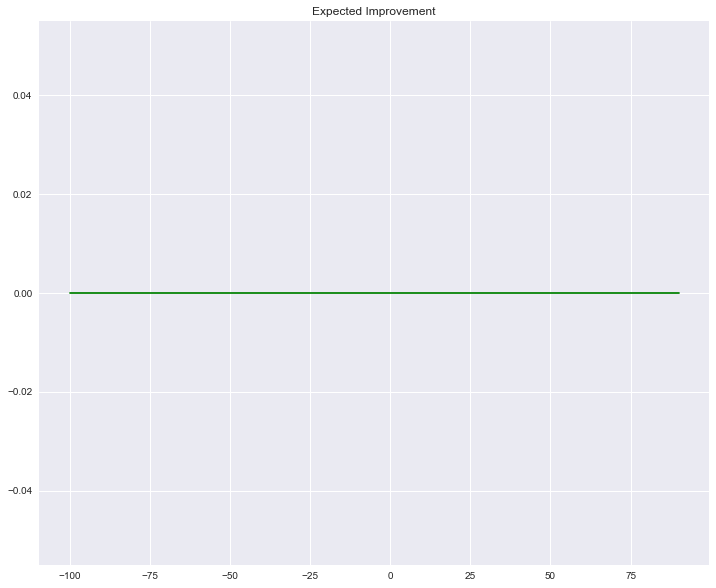

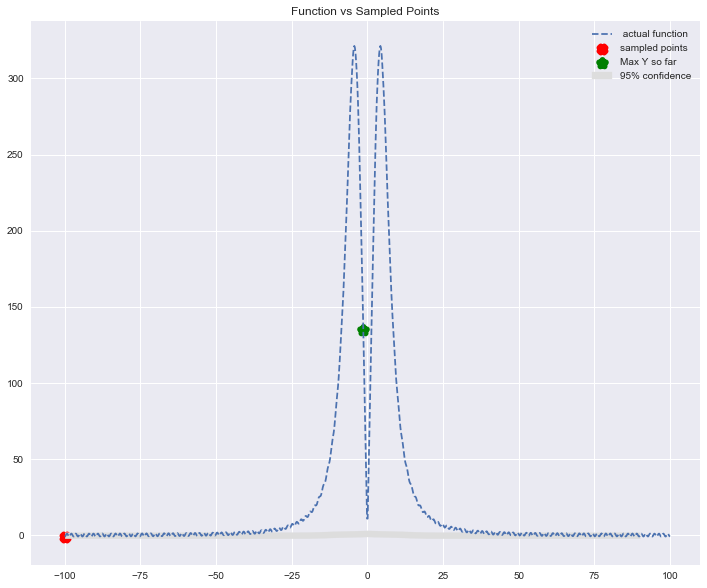

Matrix is not positive definite


KeyboardInterrupt: 

In [966]:
# Used for Expected Improvement 

for i in range(samples):
    
    x_sampled_points, y_sampled_points, sampled_var, best_x, best_y, improvements, domain, mus = next(gen)
    # Expectd Improvement
    plt.figure(figsize=(12,10))
    plt.title('Expected Improvement')
    plt.plot(domain,improvements,label='Expected improvements',color='green')
    
    
    plt.figure(figsize=(12,10))
    plt.title("Function vs Sampled Points")
    
    train_y_x_axis = np.array(np.linspace(-100,100,1000))
    train_y_numbers_ = [train_y_func(i) for i  in train_y_x_axis]
    
    plt.plot(train_y_x_axis,train_y_numbers_, label=' actual function',linestyle="--")
    
    print(f"Point on x-axis just sampled ={x_sampled_points[-1]}")
    plt.scatter(x_sampled_points,y_sampled_points, color='red',marker='X',label='sampled points',linewidths=5)
    plt.scatter(best_x,best_y, marker = "*",label='Max Y so far',linewidths=6, color = 'green')

    
    mus = np.array(mus)
    domain = np.array(domain)
    
      # 95% confidence bars
    plt.gca().fill_between( domain.flat, mus-2*np.sqrt(sampled_var),
                           mus+2*np.sqrt(sampled_var), color="#dddddd",label='95% confidence')
    
#     print(len(x_sampled_points) , 'x sampled')
#     print(len(mus),'mus')
#     print(len(domain),'len domain')
#     print(len(sampled_var),'sample var')
     # Sizes for the axis
  
    
   
    
    

    plt.legend()
#     plt.ylim(-100,100)

    
    plt.show();


    
    # pause so we can see the graph
    #time.sleep(3);


In [ ]:
np.linalg.cholesky(